<a href="https://colab.research.google.com/github/CorentinMAG/NLP/blob/main/Assignment1_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
In this assignement you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features

You are advised to look at the code and understand it.

You will be then asked to perform feature extraction and classification yourself.

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Document Classification Tutorial

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [ ]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [ ]:
dataset_name = "aclImdb"

CHANGED: If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

IMPORTANT: DO NOT RUN THIS SECTION UNLESS YOU NEED IT.


In [ ]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(folder, "Datasets")

for filename in os.listdir(folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

Current work directory: /content
Cleaned


## Dataset Download
Dowload the Imdb movie reviews dataset


In [ ]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful download
Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [ ]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": score,
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

/content/Datasets/Original/aclImdb/train/pos/8147_10.txt
8147_10.txt
8147
Fear of a black hat is a hilarious spoof of Hip-Hop culture. It is just as funny as This Is Spinal Tap, if not funnier. The actors are incredible and the documentary style is superb. Mark Christopher Lawrence is a tremendous talent that should be starring in a lot more films. This film is a true cult classic!
10
pos
train
{'file_id': '8147', 'score': '10', 'sentiment': 1, 'split': 'train', 'text': 'Fear of a black hat is a hilarious spoof of Hip-Hop culture. It is just as funny as This Is Spinal Tap, if not funnier. The actors are incredible and the documentary style is superb. Mark Christopher Lawrence is a tremendous talent that should be starring in a lot more films. This film is a true cult classic!'}


Little analysis of the dataframe

In [ ]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())


for split in ["train", "test"]:
    df1 = df.loc[df['split'] == split]
    column = 'score'
    print("Distribution of scores in %s: " % (split))
    print(df1[column].value_counts())

Dataframe structure:
      file_id score  ...  split                                               text
0        8147    10  ...  train  Fear of a black hat is a hilarious spoof of Hi...
1       11403     9  ...  train  Gene Kelly came up with some really grand idea...
2        5119    10  ...  train  I just have to say, this is one of my favorite...
3        1861    10  ...  train  ...intimate and specific. Yes, a bit of a cind...
4        9050     8  ...  train  This is a gem, a real piece of Americana for a...
...       ...   ...  ...    ...                                                ...
49995   11554     2  ...   test  Having lived in Michigan's Upper Peninsula (30...
49996     404     1  ...   test  I watched this movie based on the comments of ...
49997    1166     1  ...   test  When "Deranged" was made the film-makers saw f...
49998    2297     4  ...   test  The glorious Edward gets to move up in the wor...
49999    6377     1  ...   test  Jon Stewart (aka John Liebowitz) 

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

Negative:


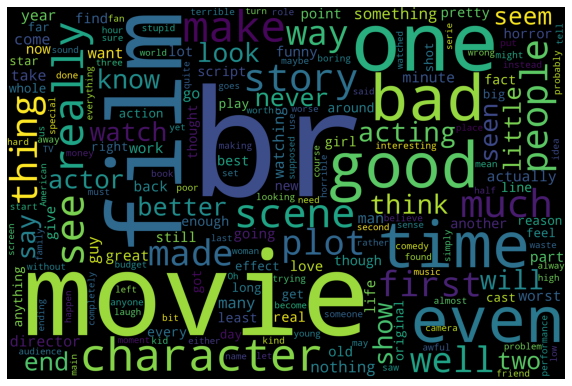

Positive:


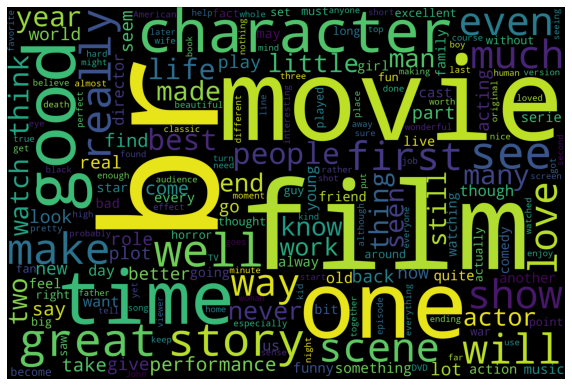

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

*Some words are classifed as positive or negative even thought they don't convey the meaning at all (like show, character,...) and some words appear in both categories (like film,character,...). So it's pretty clear that the job hasn't been done yet.*

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [ ]:
print(len(vectorizer.vocabulary_))

74849


Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).

In [ ]:
print(X_train)

  (0, 72259)	0.037450355428399834
  (0, 73702)	0.04533945856331851
  (0, 72557)	0.028644017186505357
  (0, 56275)	0.07080151374444997
  (0, 56155)	0.06179611182526213
  (0, 11130)	0.06353834840541232
  (0, 27312)	0.0424170943080097
  (0, 23615)	0.10465453584136697
  (0, 68148)	0.05343556617638685
  (0, 32936)	0.11782943832674654
  (0, 5436)	0.03708176391766288
  (0, 62817)	0.0674116349902618
  (0, 61380)	0.022888681796363563
  (0, 10357)	0.02545842821279257
  (0, 29075)	0.08958008558495807
  (0, 6166)	0.09937383354179569
  (0, 31095)	0.04820225676717415
  (0, 8611)	0.06618267190217056
  (0, 35787)	0.02425445973274696
  (0, 64740)	0.13060357644194065
  (0, 63747)	0.09116066685778466
  (0, 4965)	0.09295991122065
  (0, 3167)	0.02235640154045453
  (0, 72757)	0.03458502361892899
  (0, 6172)	0.13588427874151193
  :	:
  (24999, 43838)	0.05394858979756879
  (24999, 34683)	0.04479488038662848
  (24999, 4465)	0.05780807515939459
  (24999, 46916)	0.039223667388549356
  (24999, 2821)	0.03151419934

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [ ]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

In [ ]:
# training and testing
from sklearn.svm import LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [ ]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



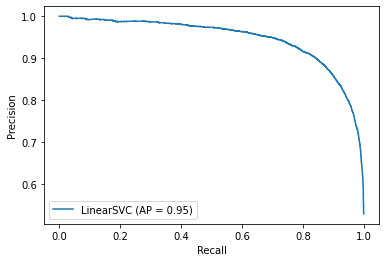

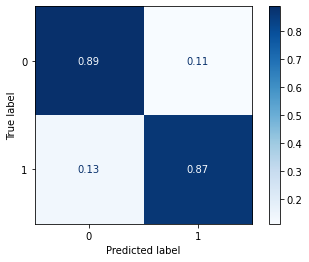

In [ ]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

# Now...do it yourself!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

## First part
As first part, experiment with the options of the vectorizer to improve the classification using logistic regression. You are required to look at the documentation of the functions.
You can also use or add other pre-processing step to the text if you feel like it, you are not obliged to use TfidfVectorizer.

Obviously, you will need to use the variable names declared in the first block.


Some notes:
* In the multi-class classification, the most important measures are F1s (especially macro and micro), since it is a complex measure given that considers more aspects than the simple accuracy.
* Between the problem as regression and the problem as multi-class classification, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2). The classification perspective is a tool to understand the problem better and experiment. 
* There are no threshold values that you have to reach with the measurements to obtain a certain score. The score will be assigned considering the results of the class and the efforts we will see in the solution.
* In each code section, you have to deliver a single approach, but if you have observations or interesting alternative approaches, you can mention them in the .txt file

### Text cleaning

We need to preprocess all reviews in order to get better result  
We will do :
* stemming
* remove html tags
* remove punctuations
* remove digits
* rewrite reviews in lowercase
* remove stop words

then we will construct our BoW with a TDIFVectorizer  
We will try to tune the hyperparameters with a GridSearchCV and then we will train a LogisticRegression

In [ ]:
### ALL IMPORT NEEDED ###
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import nltk
import seaborn as sns
import collections
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
import re,string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We create a class that handle preprocessing text (stemming, remove html,lowercase, punctuation, stop words....)

In [ ]:
class CleanText(BaseEstimator, TransformerMixin):

    # remove <br> and others html tags
    def remove_html(self,input_text):
      return re.sub(r'<[^>]*>','',input_text).strip()

    # if there is url in review, we remove them because they are useless for sentiment analysis
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)
      
    # digits don't convey usefuls information in sentiments analysis
    def remove_digits(self, input_text):
      return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_html).apply(self.remove_urls).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X


In [ ]:
# we need to convert score to integer
df['score']=pd.to_numeric(df['score'])

# we copy the dataframe beacause we want to save the raw data
dff = df.copy()

## CLEAN DATA / PREPROCESSING
cleaner = CleanText()
cleaned_data = cleaner.fit_transform(dff['text'])

# we replace all the text in the dataframe with the processed reviews
dff['text'] = cleaned_data

### Words visualization
We can now look at the most frequent words in our new dataset

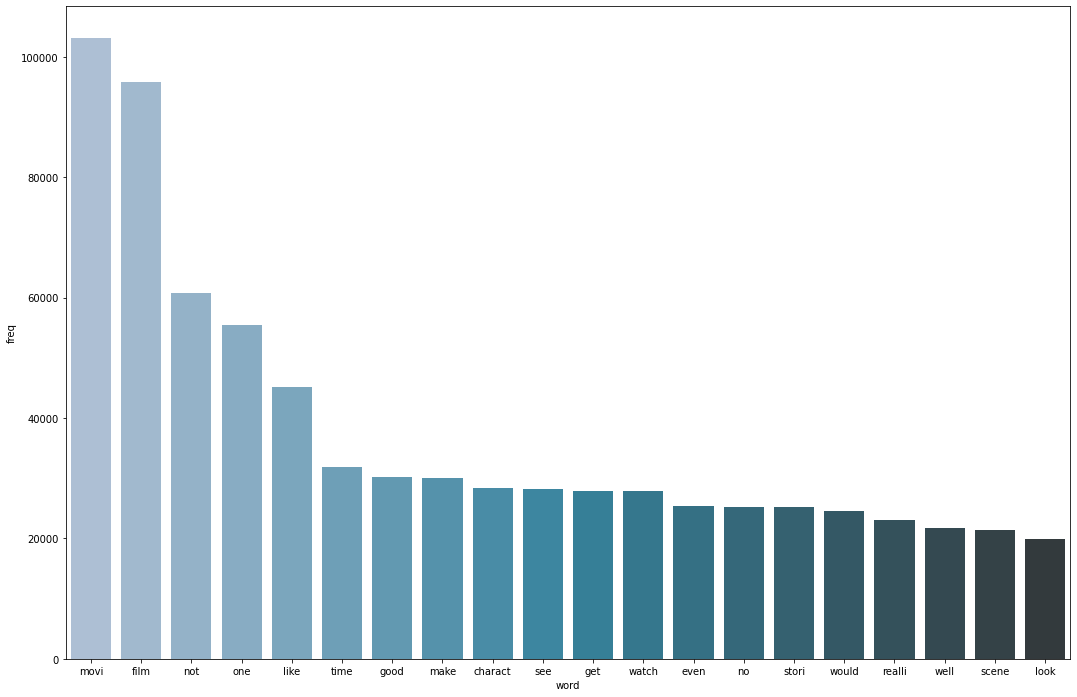

In [ ]:
# ## now we can look at the most frequent words
cv = CountVectorizer()
bow = cv.fit_transform(cleaned_data)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

### Train/test dataset 
We create our training and test dataset and fit the TfidVectorizer

In [ ]:
## TRAINING DATASET
train_df = dff[dff['split'] == 'train']
text_train = train_df['text'].tolist()
score_train = train_df['score'].tolist()

## TEST DATASET
test_df = dff[dff['split'] == 'test']
text_test = test_df['text'].tolist()
score_test = test_df['score'].tolist()

### GridSearch part

In [ ]:
## GRIDSEARCHCV PART

pipe = Pipeline(steps=[('tfid', TfidfVectorizer()), ('logistic', LogisticRegression())])
param_grid = {
    'tfid__max_df': (0.25,0.5,0.75),
    'tfid__min_df': (1,2,5,10),
    'tfid__ngram_range':((1,2),),
    'logistic__max_iter': (1000,), # we do not modify the parameters of the LogisticRegression 
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(text_train, score_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.434):
{'logistic__max_iter': 1000, 'tfid__max_df': 0.5, 'tfid__min_df': 5, 'tfid__ngram_range': (1, 2)}


### Creation of the vectorizer and regression part

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.5,min_df=5)

X_train = vectorizer.fit_transform(text_train)
Y_train = np.array(score_train)

X_test = vectorizer.transform(text_test)
Y_test = np.array(score_test)

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, Y_train)

Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)
####################################################################

Now test your results running the code below:

R2 score 0.479865
MAE 1.474880
MSE 6.338320
              precision    recall  f1-score   support

           1       0.51      0.85      0.64      5022
           2       0.21      0.03      0.05      2302
           3       0.28      0.11      0.15      2541
           4       0.33      0.34      0.34      2635
           7       0.32      0.22      0.26      2307
           8       0.27      0.22      0.24      2850
           9       0.21      0.03      0.05      2344
          10       0.48      0.80      0.60      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.29     25000
weighted avg       0.36      0.43      0.36     25000

[[4293   65  117  238   25   39    6  239]
 [1505   70  172  313   32   45    5  160]
 [1162   93  274  607   94   86    8  217]
 [ 757   67  260  896  191  178   17  269]
 [ 148   18   68  306  501  549   53  664]
 [ 165   10   54  164  391  630   80 1356]
 [ 123    4   19   80  162  431   61 1464]
 [ 2

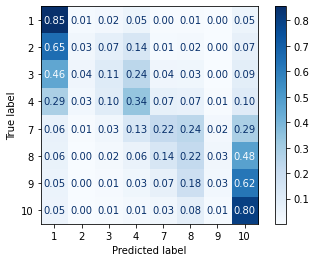

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))


# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

####################################################################

In [ ]:
from sklearn.metrics import f1_score

print("F1 macro score %f " % (f1_score(Y_test,Y_pred_test,average='macro'))) # the macro is not realy good
print("F1 micro score %f" % (f1_score(Y_test,Y_pred_test,average='micro')))
for i,score in enumerate(f1_score(Y_test,Y_pred_test,average=None)):
  print(score)

F1 macro score 0.291702 
F1 micro score 0.429680
0.6403279910547894
0.05370650529500756
0.1548897682306388
0.33778949350404824
0.2594033722438392
0.24127349443805138
0.046212121212121204
0.600014944332362


As we can see, the score is quite good for the first and last classes but not at all for others classes.  
The micro score shows that our model makes a lot of false positive.  
The macro score highlight that the model is highly inaccurate.

### Conclusion

There are several others things we can do in order to improve the accuracy of the model. Therefore, we will not follow these directives because runing an algorithm like GridSearchCV takes a lot of time.
* try another vectorizer (CountVectorizer) and compare both
* tune the LogisticRegressor hyperparameters, but in this part, the directives are to only tune the vectorizer
* try another model, LogisticRegressor may not be the best choice for sentiment analysis

We can try a prediction on random reviews I picked from IMDB

In [ ]:
new_reviews = pd.Series(["I love this movie and all of the GF movies. I see something new every time I have seen it (countless, truly). The story of tragedy and (little) comedy that exists in this film is easily understood by people all over the world. This film has been called an American story however I have met others who have seen this movie in other languages and they seem to have the same love and appreciation for it that I do. I love the characters and all of the different personalities that they represent not just in families but in society itself. It seems like the entire cast is part of every other movie that I love as well.","One thing that's a bit annoying when seeing 'The Godfather' is the sense that, as a viewer, you feel you are required to bow down before this film and worship it as movie perfection, or else reveal yourself to be a person of no taste. Well, I can definitely acknowledge that this is a very good movie, but not necessarily great, nor is it on my personal favorites list.","Boring, tedious, a hugely underwhelming experience. This could have been a good movie with a director and an editor who were not asleep at the wheel and knew when enough was enough! Huge unwanted pregnant pauses, moody silences, all the narcissistic art house red flags, on the same par with the equally boring 'The tree of Life' from a few years ago! A major disappointment, I was actually looking forward to it but after slogging through the first slower than slow 70 minutes I realized that it was not going to get any better, yet I stayed for till the end, bigger fool I! 'Winter Sleep' is an ironic title because it certainly lead me to the land of nod!"])
processed_data = cleaner.fit_transform(new_reviews)
X = vectorizer.transform(processed_data.to_list())
classifier.predict(X)

array([10, 10,  1])

Our model seems to catch the global meaning of a review but is not very accurate  
The real score of the reviews are:
* 1st review : 9
* 2nd review : 8
* 3rd review : 4

## Second part
Now experiment both with the processing (the vectorizer) and the classifier to obtain the best result.

This time, instead of TDIFVectorizer we will try a CountVectorizer.  
We will again use LogisticRegressor.

We will use the training/test datasets we have defined above (so our data have already been preprocessed).

### GridSearchCV part

In [ ]:
pipe = Pipeline(steps=[('cntv', CountVectorizer()), ('clf', LogisticRegression())])
param_grid = {
    'cntv__max_df': (0.25,0.5,0.75),
    'cntv__min_df': (1,2,5,10),
    'cntv__ngram_range':((1,2),),
    'clf__max_iter': (1000,),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(text_train, score_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.415):
{'clf__max_iter': 1000, 'cntv__max_df': 0.5, 'cntv__min_df': 1, 'cntv__ngram_range': (1, 2)}


In [ ]:
# vectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=1,max_df=0.5)

# train set
X_train = vectorizer.fit_transform(text_train)
Y_train = np.array(score_train)

# test set
X_test=vectorizer.transform(text_test)
Y_test=np.array(score_test)

# classifier
classifier = LogisticRegression(max_iter=1000)

Run the code below to train your classifier, then test it with the block that follows.

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)
####################################################################

R2 score 0.498828
MAE 1.475800
MSE 6.107240

              precision    recall  f1-score   support

           1       0.55      0.74      0.63      5022
           2       0.20      0.12      0.15      2302
           3       0.24      0.17      0.20      2541
           4       0.31      0.30      0.30      2635
           7       0.29      0.24      0.26      2307
           8       0.26      0.22      0.24      2850
           9       0.19      0.11      0.14      2344
          10       0.51      0.70      0.59      4999

    accuracy                           0.40     25000
   macro avg       0.32      0.32      0.31     25000
weighted avg       0.36      0.40      0.37     25000

[[3709  394  299  290   42   54   28  206]
 [1158  281  303  307   56   54   22  121]
 [ 857  324  425  539  129   86   37  144]
 [ 525  240  441  794  219  178   71  167]
 [  96   56  110  290  548  488  195  524]
 [ 109   37   96  158  469  622  330 1029]
 [  93   21   44   97  225  421  249 1194]
 [ 

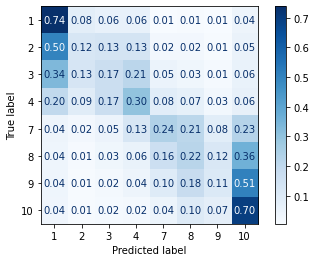

In [ ]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")
####################################################################

### Conclusion

We see that just by changing the vectorizer to a CountVectorizer seem to get better results

Indeed, the f1-score (macro and micro) are higher than before.

To conclude, the best way to increase performance with a LogisticRegression is to use CountVectorizer instead of TdifVectorizer. This is quite an unexpectly behaviour as TdifVectorizer aim is to overcome issues of CountVectorizer (by assigning more weight to less frequent words)

Therefore, the results are still low, we could also train a new Classifier but I found relevant to compare both vectorizers with the same classifier.

Besides, we know that LogisticRegression is one of the best classifer we can found in the scikit-learn library (because this model take care of correlations between words ). We could try NaivesBayes model, but even if the training is faster and doesn't require to tune hyperparameters, this kind of algorithm isn't worth because it doesn't care about correlations.

I've tried other models, like RandomForestClassifier and SGDClassifier but I didn't achieve to get better result.

Last but not least, we should try another words representations methods, try words embedding instead of vectorizers. Moreover, even if LogisticRegression take care of correlation, it's maybe not enough, because the length of our reviews are too long (that why our results are too weaks, maybe with shorter reviews we could achieve better reviews).

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020)